In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize so that network learns easier (divide by 255)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

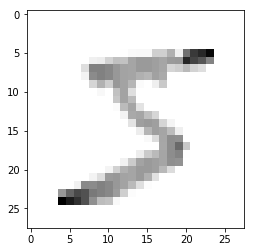

In [2]:
import matplotlib.pyplot as plt
# after normalize, it will look lighter as intensity normalized
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [3]:
# Building the model (in-sample)
model = tf.keras.models.Sequential()

# flatten the 3d array into one whole flat vector
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam' ,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 8s 137us/step - loss: 0.2670 - acc: 0.9215

In [4]:
# Did it overfit ?

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 51us/step
0.14156679911091924 0.9593


In [7]:
# predictions 

predictions = model.predict([x_test])

In [9]:
import numpy as np

In [10]:
np.argmax(predictions[0])

7

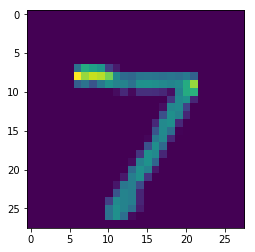

In [12]:
# is it 7 ?

plt.imshow(x_test[0])
plt.show()